In [6]:
!pip install -i https://test.pypi.org/simple/ datret

import numpy as np
import pandas as pd 
from datret.datret import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Looking in indexes: https://test.pypi.org/simple/
/kaggle/input/insurance/insurance.csv


In [7]:
data = pd.read_csv('/kaggle/input/insurance/insurance.csv')
data['sex'] = data['sex'].map({'female':0, 'male':1}).astype(int)
data['smoker'] = data['smoker'].map({'no':0, 'yes':1}).astype(int)
data['region'] = data['region'].map({'southeast':0, 'southwest':1, 'northwest': 3, 'northeast': 4}).astype(int)
dataFrameRMSE = pd.DataFrame(index = [  
                      'RandomForest', 
                      'CatBoost', 
                      'DatRet',  
                      ], columns = ['10%', '20%', '30%', '40%', '50%', '60%'])
dataFrameRMSE

,10%,20%,30%,40%,50%,60%
RandomForest,NaN,NaN,NaN,NaN,NaN,NaN
CatBoost,NaN,NaN,NaN,NaN,NaN,NaN
DatRet,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    X_train, X_test, y_train, y_test = train_test_split(data.drop(["charges"], axis=1), data["charges"],
                                                random_state=10, test_size=i)
    #RandomForest
    RF = RandomForestRegressor(random_state=0)
    RF.fit(X_train, y_train)
    RF_pred = RF.predict(X_test)
    dataFrameRMSE.loc['RandomForest'][f'{int(i*100)}%'] = np.round(mean_squared_error(y_test, RF_pred, squared=False), 2)
    
    #Catboost
    CB = CatBoostRegressor(random_state=0, verbose=0)
    CB.fit(X_train, y_train)
    CB_pred = CB.predict(X_test)
    dataFrameRMSE.loc['CatBoost'][f'{int(i*100)}%'] = np.round(mean_squared_error(y_test, CB_pred, squared=False), 2)
    
    #DatRet
    DR = DatRetRegressor(optimizer=Adam(learning_rate=0.01))
    DR.fit(X_train, y_train)
    DR_pred = DR.predict(X_test)
    dataFrameRMSE.loc['DatRet'][f'{int(i*100)}%'] = np.round(mean_squared_error(y_test, DR_pred, squared=False), 2)

Epoch 1/50
120/120 [==============================] - 1s 5ms/step - loss: 79372136.0000
Epoch 2/50
120/120 [==============================] - 1s 5ms/step - loss: 45754408.0000
Epoch 3/50
120/120 [==============================] - 1s 5ms/step - loss: 38616416.0000
Epoch 4/50
120/120 [==============================] - 1s 5ms/step - loss: 37498220.0000
Epoch 5/50
120/120 [==============================] - 1s 5ms/step - loss: 28584172.0000
Epoch 6/50
120/120 [==============================] - 1s 4ms/step - loss: 31237166.0000
Epoch 7/50
120/120 [==============================] - 1s 4ms/step - loss: 29028236.0000
Epoch 8/50
120/120 [==============================] - 1s 5ms/step - loss: 32780912.0000

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.
Epoch 9/50
120/120 [==============================] - 1s 4ms/step - loss: 24234334.0000
Epoch 10/50
120/120 [==============================] - 1s 4ms/step - loss: 22573840.0000
Epoch 11/50
120/120 [=================

In [9]:
dataFrameRMSE

,10%,20%,30%,40%,50%,60%
RandomForest,5736.44,5205.53,4777.33,4954.96,4903.56,4793.0
CatBoost,5732.53,5251.25,4664.25,4986.09,5044.53,4989.35
DatRet,5860.79,5173.48,4610.44,4927.62,5047.06,5780.43


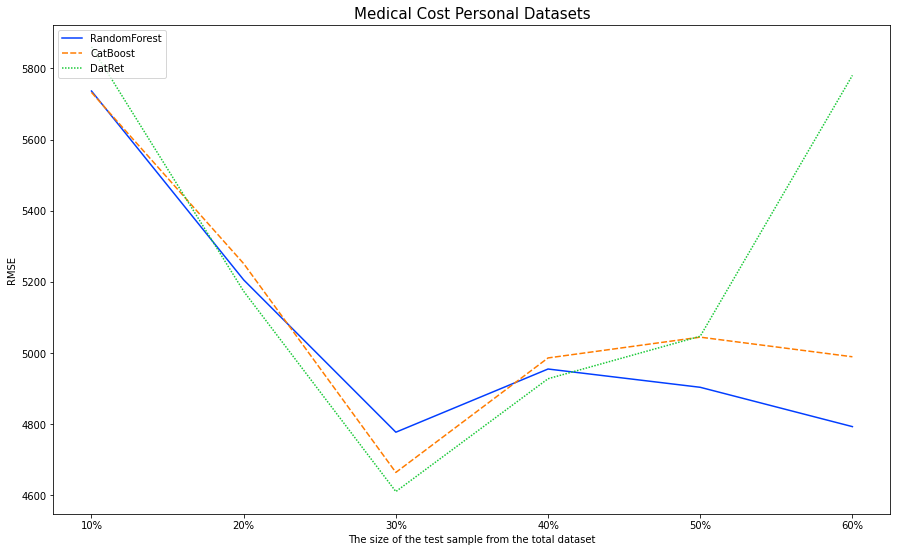

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 9))
plt.title("Medical Cost Personal Datasets", fontsize=15)
plt.xlabel("The size of the test sample from the total dataset")
plt.ylabel("RMSE")
sns.lineplot(data = dataFrameRMSE.T, palette="bright")
plt.legend(loc = 'upper left');